In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rho = 28  # scaled Rayleigh number
sigma = 10  # Prandtl number
beta = 8 / 3  # geometry aspect ratio

In [3]:
# initial conditions
y0 = [-8, 8, 27]  # initial state
dt = 0.01  # change in time
T = 25  # endpoint in time
num_time_pts = int(T / dt)  # time points for trajectory
t = np.linspace(0, T, num_time_pts)  # time interval

In [4]:
def lorenz(t, y):
    dy = [sigma * (y[1] - y[0]), y[0] * (rho - y[2]) - y[1], y[0] * y[1] - beta * y[2]]
    return np.array(dy)

In [5]:
def rk4_ss(fun, dt, t0, y0):
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 2, y0 + (dt / 2) * f1)
    f3 = fun(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = fun(t0 + dt, y0 + dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout

In [6]:
def runge_kutta(y0, dt, t, num_time_pts):
    Y = np.zeros((3, num_time_pts))
    Y[:, 0] = y0
    yin = y0
    for i in range(num_time_pts - 1):
        yout = rk4_ss(lorenz, dt, t[i], yin)
        Y[:, i + 1] = yout
        yin = yout
    return Y


# compute trajectory
Y = runge_kutta(y0, dt, t, num_time_pts)

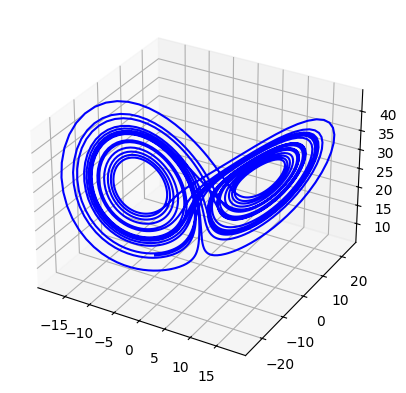

In [7]:
ax = plt.figure().add_subplot(projection="3d")
ax.plot(Y[0, :], Y[1, :], Y[2, :], "b")
plt.show()

In [9]:
# Create 3D scatter plot
x, y, z = Y
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode="lines", marker=dict(size=2))])

# Customize layout
fig.update_layout(
    scene=dict(
        aspectmode="cube",
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z"),
    ),
    title="Lorenz Attractor",
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()